# Aula 3.3 - Correlação - Desafio

Com dados *simulados** de **# vendas de máscaras** vs. **# casos confirmados de Covid** entre outras características (nº de pessoas negativadas para Covid; # mortes por Covid; valores de frete para vendas das máscaras e valor (R$) gasto na campnha de marketing até aquela data), responda as perguntas a seguir.  
<br /> 

**Os dados foram simulados para servirem o próposito dos exercícios, portanto, não são verossímeis (não são reais) fazendo com que os valores negativos que constam na base tenha sua interpretação ignorada. Ou seja, não verifique a coerência dos valores numéricos de cada linha e variável do banco de dados.*

In [18]:
## Leitura do banco de dados


# Importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from numpy import mean

In [19]:
df = pd.read_excel("/content/Rogério Chagas - [Case]Covid_Vendas.xlsx")

df.head()

,Data,Vendas_mascaras,Confirmados_covid,Negativados_covid,Mortes_covid,Frete_vendas_mascaras,MKT_R$
0,2022-01-01,-9720.509765,-4987.382170,-5874.243660,1,-0.160886,9.448831e+07
1,2022-01-02,-50939.315202,119176.535463,-33368.423688,1,-0.756737,2.594814e+09
2,2022-01-03,-44858.430524,5488.834610,13992.071978,1,0.581338,2.012279e+09
3,2022-01-04,137323.877129,59640.323314,98578.919151,1,0.549515,1.885785e+10
4,2022-01-05,-44469.185816,19380.453709,30999.065352,1,-0.763076,1.977508e+09


In [20]:
# Verificando se existem valores faltantes no dataframe:

df.isnull().sum()

Data                     0
Vendas_mascaras          0
Confirmados_covid        0
Negativados_covid        0
Mortes_covid             0
Frete_vendas_mascaras    0
MKT_R$                   0
dtype: int64

In [21]:
# Transformando os valores negativos em valores absolutos:

df.Vendas_mascaras = df.Vendas_mascaras.abs()

df.Confirmados_covid = df.Confirmados_covid.abs()

df.Negativados_covid = df.Negativados_covid.abs()

df.Frete_vendas_mascaras = df.Frete_vendas_mascaras.abs()

df

,Data,Vendas_mascaras,Confirmados_covid,Negativados_covid,Mortes_covid,Frete_vendas_mascaras,MKT_R$
0,2022-01-01,9720.509765,4987.382170,5874.243660,1,0.160886,9.448831e+07
1,2022-01-02,50939.315202,119176.535463,33368.423688,1,0.756737,2.594814e+09
2,2022-01-03,44858.430524,5488.834610,13992.071978,1,0.581338,2.012279e+09
3,2022-01-04,137323.877129,59640.323314,98578.919151,1,0.549515,1.885785e+10
4,2022-01-05,44469.185816,19380.453709,30999.065352,1,0.763076,1.977508e+09
...,...,...,...,...,...,...,...
145,2020-03-11,36473.217846,33754.209401,40163.200259,27658,0.162845,1.330296e+09
146,2020-03-12,51135.093991,49635.373321,21031.945808,27650,0.419621,2.614798e+09
147,2020-03-13,55575.889189,13823.634911,7026.518927,27642,1.207726,3.088679e+09
148,2020-03-14,13654.570603,15367.510085,34268.993423,27628,0.362841,1.864473e+08


#### **1)** Como está o relacionamento entre as variáveis *Vendas* e *Confirmados*? 

In [22]:
## Código para resposta do ex 1

print(df.corr(method='pearson'))

                       Vendas_mascaras  Confirmados_covid  Negativados_covid  \
Vendas_mascaras               1.000000           0.027984           0.291204   
Confirmados_covid             0.027984           1.000000           0.417705   
Negativados_covid             0.291204           0.417705           1.000000   
Mortes_covid                 -0.003440          -0.064101          -0.001212   
Frete_vendas_mascaras        -0.018177           0.091008          -0.070676   
MKT_R$                        0.961595           0.046910           0.351152   

                       Mortes_covid  Frete_vendas_mascaras    MKT_R$  
Vendas_mascaras           -0.003440              -0.018177  0.961595  
Confirmados_covid         -0.064101               0.091008  0.046910  
Negativados_covid         -0.001212              -0.070676  0.351152  
Mortes_covid               1.000000               0.032585 -0.002867  
Frete_vendas_mascaras      0.032585               1.000000 -0.055169  
MKT_R$       

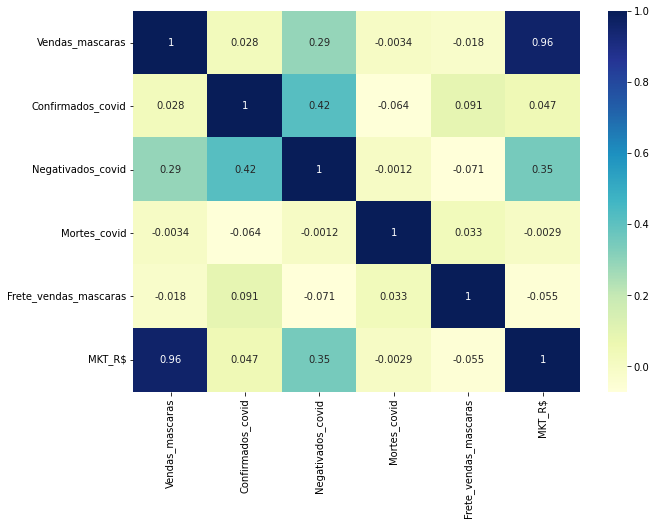

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

dataplot = sns.heatmap(df.corr(),  cmap="YlGnBu",
                      annot=True)

**Resposta:** O mapa de calor das correlações do dataset demostra uma fraca correlação positiva (apenas 0.028) entre as variáveis vendas e casos confirmados.

##### **a)** Quando olhamos o relacionamento destas variáveis apenas para o ano de 2020 (início da pandemia) o que notamos? E apenas para o ano de 2022? 
**b)** O que podemos concluir?  

In [24]:
## Código para resposta do ex 1_a) e 1_b) 


# Transformando o campo data:

df['Data'] = df['Data'].dt.strftime('%Y')



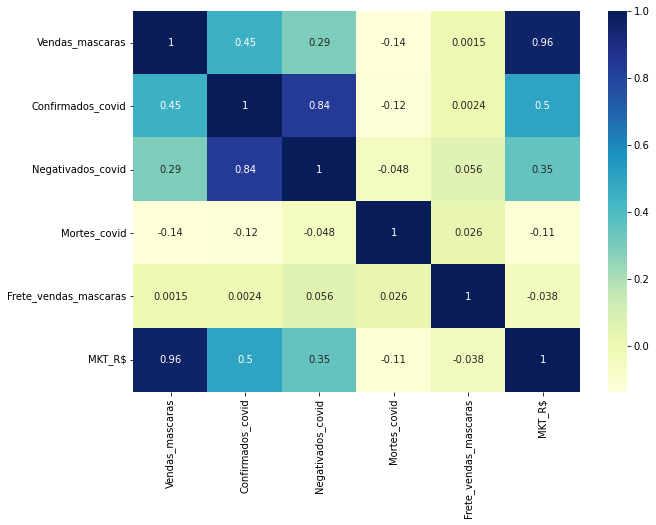

In [25]:
df_20 = df.loc[df['Data']=='2020']

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

dataplot = sns.heatmap(df_20.corr(),  cmap="YlGnBu",
                      annot=True)

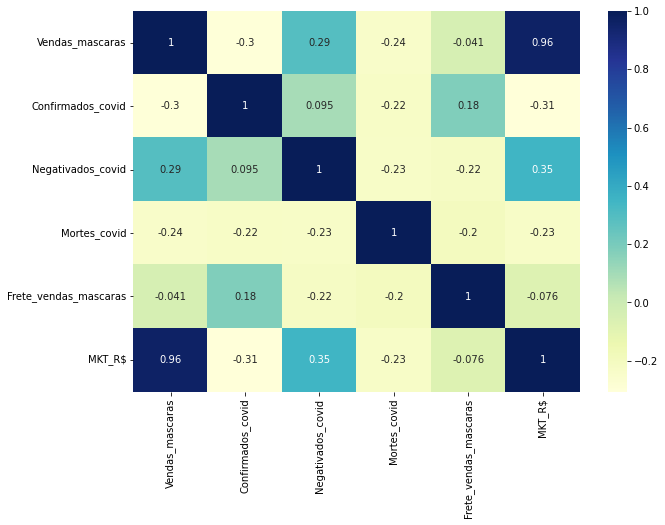

In [26]:
df_22 = df.loc[df['Data']=='2022']

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

dataplot = sns.heatmap(df_22.corr(),  cmap="YlGnBu",
                      annot=True)



**Respostas:**

**a)** Ao observar o ano de 2020 (início da pandemia) notamos a existência de uma correlação positiva moderada (0.45) entre as variáveis casos confirmados e vendas de máscaras. Todavia, ao observar o ano de 2022, a correlação entre as variáveis vendas de máscaras notamos uma correlação fraca negativa (-0.3).


**b)** Podemos concluir que ano de 2020 existia uma correlação moderada positiva entre o número de casos confirmados e a venda de máscaras, ou seja, observa-se uma tendência de aumento nas vendas de máscaras quando existe um aumento do número de casos confirmados. Todavia, no decorrer do ano de 2022, foi observado uma correlação fraca negativa. Dessa forma, conclui-se que o número de casos confirmados tem relação indireta e quase negativa com o aumento das vendas de máscaras.

#### **2)** Qual variável provavelmente pode possuir um poder maior de influência na variável *Vendas*? Por quê? Explique e demonstre seu raciocínio.

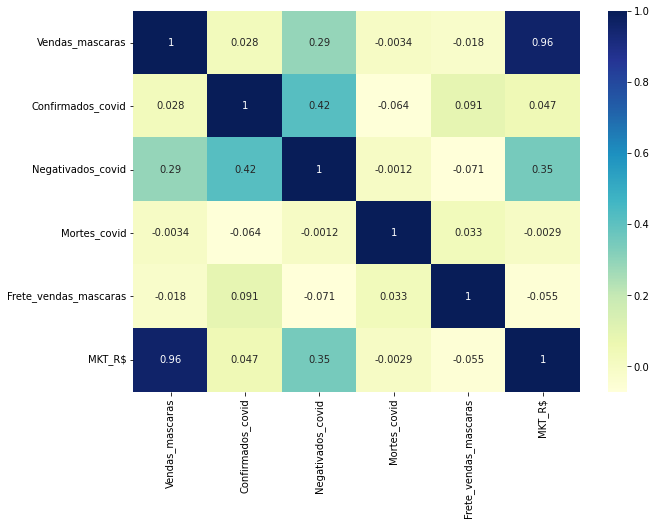

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

dataplot = sns.heatmap(df.corr(),  cmap="YlGnBu",
                      annot=True)

**Resposta:** Como indicado no mapa de calor as variáveis vendas de máscaras e gastos com markting possuem uma forte correlação positiva entre si (0.96). Logo, existe uma tendência de aumento nas vendas de máscaras quando se investe mais em marketing.

#### **3)** Em relação à variável *Vendas* e à variável *MKT*, notamos algo diferente? Como é o relacionamento dessas variáveis?

**Contexto**

A tabela abaixo mostra as vendas de máscaras e os valores gastos com o Marketing dividos em 6 categorias:

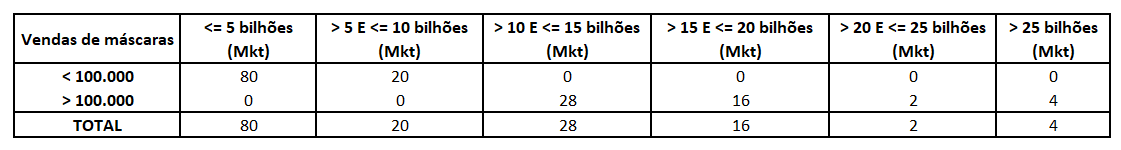
*   $H_0$: O valor da vendas de máscaras e o valor gasto com marketing são independentes (não são associados), "não há relação entre as variáveis".
*   $H_1$: O valor da vendas de máscaras e o valor gasto com marketing são dependentes (são associados).

In [28]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from scipy.stats import chi2_contingency

In [30]:
score = [80,20,0,0,0,0],[0,0,28,16,2,4]

stat, p, dof, expected = chi2_contingency(score)

alpha = 0.05

print("O valor resultante do teste é: " + str(p))
if p <= alpha:
    print('Dependente (rejeita H0).')
else:
    print('Independente (não rejeita H0).')

O valor resultante do teste é: 1.3351378873003031e-30
Dependente (rejeita H0).


**Resposta:** O teste qui-quadrado demostrou a existência uma relação de dependência entre as variáriveis vendas máscaras e investimento em marketing.